In [1]:
import numpy as np
from scipy.io.wavfile import read as wavread
from scipy.io.wavfile import write as wavwrite

/home/hafiz/.local/lib/python3.8/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.17.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
samplerate = 44100  
freq = 440
seconds = 5
time = np.linspace(0., seconds, seconds*samplerate, endpoint=False)
signal = np.sin(2*np.pi*freq*time)

# The final amplitude should span the signed 16-bit integers range [-2**15,2**15)
amplitude = np.iinfo(np.int16).max # iinfo returns the range for the int16 type, then max resolves to -> 2**15 
data = amplitude * signal 
wavwrite("H0e120a.wav", samplerate, data.astype(np.int16))

In [10]:
rate, data = wavread('H0e120a.wav')
print('rate:',rate,'Hz')
print('data is a:',type(data))
print('data shape is:', data.shape)

rate: 44100 Hz
data is a: <class 'numpy.ndarray'>
data shape is: (220500,)


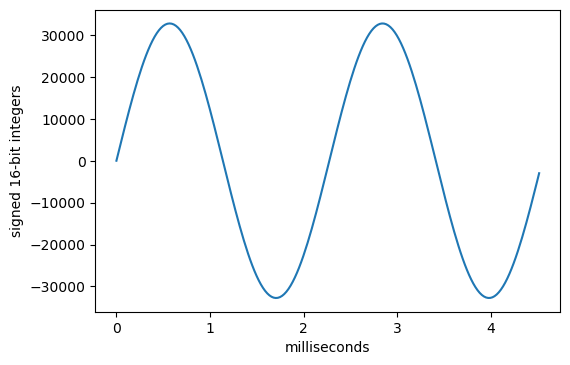

In [11]:
import matplotlib.pyplot as plt
plt.subplots(dpi=100)
plt.plot(time[:200]*1000, data[:200])
plt.xlabel('milliseconds')
plt.ylabel('signed 16-bit integers')
plt.show()

In [12]:
import simpleaudio as sa

# Start playback and wait for playback to finish before exiting
play_obj = sa.play_buffer(data, 1, 2, 44100)
play_obj.wait_done()

In [4]:
# import required libraries
from pydub import AudioSegment 
from pydub.playback import play 
  
# Import an audio file 
# Format parameter only
# for readability 
wav_file = AudioSegment.from_file(file = "L0e030a.wav", 
                                  format = "wav") 
  
# Play the audio file
play(wav_file)

In [5]:
from pydub import AudioSegment 
  
# import the audio file
wav_file = AudioSegment.from_file(file="H0e120a.wav", format="wav") 
  
# data type fo the file
print(type(wav_file)) 
# OUTPUT: <class 'pydub.audio_segment.AudioSegment'>
  
#  To find frame rate of song/file
print(wav_file.frame_rate)   
# OUTPUT: 22050 
  
# To know about channels of file
print(wav_file.channels) 
# OUTPUT: 1
  
# Find the number of bytes per sample 
print(wav_file.sample_width ) 
# OUTPUT : 2
  
  
# Find Maximum amplitude 
print(wav_file.max)
# OUTPUT 17106
  
# To know length of audio file
print(len(wav_file))
# OUTPUT 60000 
  
'''
We can change the attrinbutes of file by 
changeed_audio_segment = audio_segment.set_ATTRIBUTENAME(x) 
'''
wav_file_new = wav_file.set_frame_rate(50) 
print(wav_file_new.frame_rate)

<class 'pydub.audio_segment.AudioSegment'>
44100
1
2
32766
5000
50


In [1]:
import pydub 
from pydub.playback import play
  
wav_file =  pydub.AudioSegment.from_file(file = "elev0/L0e090a.wav", 
                                         format = "wav") 
print (wav_file)

# Increase the volume by 10 dB 
new_wav_file = wav_file + 10 
  print (new_wav_file)
# Reducing volume by 5
silent_wav_file = wav_file - 46
  
#  Playing silent file
# play(silent_wav_file)

d:\Ananconda\envs\new_env\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
